### Imports

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_absolute_error, confusion_matrix

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Reading data

In [2]:
colnames = ["class", "alcohol", "malicacid", "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "OD280_OD315_of_diluted_wines", "proline"]
wine_df = pd.read_csv("./datasets/wine/wine.data", names=colnames)

In [3]:
wine_df.head()

,class,alcohol,malicacid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Numerical data exploratory

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malicacid                     178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  OD280_OD315_of_diluted_wines  178 non-null    float64
 13  proli

### Splitting dataset

separating the **label** from the features

In [5]:
X = wine_df.drop(columns=["class"])
y = wine_df["class"]

In [6]:
X.head()

,alcohol,malicacid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
y.unique()

array([1, 2, 3], dtype=int64)

#### Splitting into train and validation sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 138 to 102
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       124 non-null    float64
 1   malicacid                     124 non-null    float64
 2   ash                           124 non-null    float64
 3   alcalinity_of_ash             124 non-null    float64
 4   magnesium                     124 non-null    int64  
 5   total_phenols                 124 non-null    float64
 6   flavanoids                    124 non-null    float64
 7   nonflavanoid_phenols          124 non-null    float64
 8   proanthocyanins               124 non-null    float64
 9   color_intensity               124 non-null    float64
 10  hue                           124 non-null    float64
 11  OD280_OD315_of_diluted_wines  124 non-null    float64
 12  proline                       124 non-null    int64  
dtypes: 

### Constructing the DecisionTree Classifier

In [10]:
model = DecisionTreeClassifier(criterion="gini", random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.5, 0.9, 'x[9] <= 3.82\ngini = 0.658\nsamples = 124\nvalue = [40, 50, 34]'),
 Text(0.3, 0.7, 'x[12] <= 1010.0\ngini = 0.083\nsamples = 46\nvalue = [2, 44, 0]'),
 Text(0.2, 0.5, 'x[2] <= 3.07\ngini = 0.043\nsamples = 45\nvalue = [1, 44, 0]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 44\nvalue = [0, 44, 0]'),
 Text(0.3, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.7, 0.7, 'x[6] <= 1.4\ngini = 0.567\nsamples = 78\nvalue = [38, 6, 34]'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]'),
 Text(0.8, 0.5, 'x[12] <= 724.5\ngini = 0.236\nsamples = 44\nvalue = [38, 6, 0]'),
 Text(0.7, 0.3, 'x[0] <= 13.145\ngini = 0.245\nsamples = 7\nvalue = [1, 6, 0]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]')]

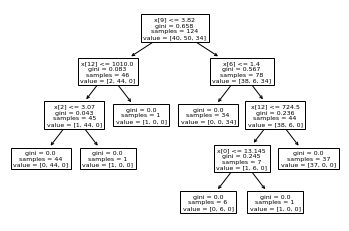

In [11]:
plot_tree(model)

In [13]:
# printing the prediction probabilities
prob = model.predict_proba([[13.41,3.84,2.12,18.8,90,2.45,2.68,.27,1.48,4.28,.91,3,1035]])
print(f"Prediction prob: {prob}")

# making a prediction
pred = model.predict([[13.41,3.84,2.12,18.8,90,2.45,2.68,.27,1.48,4.28,.91,3,1035]])
print(f"Prediction: {pred}")

Prediction prob: [[1. 0. 0.]]
Prediction: [1]


C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Evaluating model performance on the training set

#### Using Mean Absolute Error

In [14]:
y_train_pred = model.predict(X_train)
y_train_pred

array([3, 2, 2, 1, 2, 1, 3, 2, 2, 3, 1, 1, 1, 3, 1, 1, 2, 3, 2, 1, 3, 2,
       1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 1, 3, 2, 2, 2, 1, 2, 2, 2, 3, 3, 1,
       2, 3, 3, 2, 2, 1, 2, 3, 3, 2, 3, 2, 2, 2, 1, 1, 3, 1, 3, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 2, 3, 2, 2, 2, 3, 3, 2, 1, 1, 2, 3, 3, 1, 2, 3,
       3, 3, 3, 2, 1, 2, 1, 3, 1, 1, 2, 1, 1, 3, 2, 1, 3, 3, 1, 1, 3, 3,
       3, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 1, 2, 2], dtype=int64)

In [15]:
mse = mean_absolute_error(y_train, y_train_pred)

In [16]:
mse

0.0

**error: 0 🤔**

#### Using confusion matrix

In [17]:
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[40,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 34]], dtype=int64)

**NB:** Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class.

### Evaluating model performance on the Validation (Test) Set

In [18]:
y_test_pred = model.predict(X_test)
y_test_pred

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3], dtype=int64)

#### Using mean absolute error

In [19]:
mse = mean_absolute_error(y_test, y_test_pred)
mse * 100

5.555555555555555

5% error on the validation set, That's 94.45% accuracy 💪

#### Using the confusion matrix

In [20]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[18,  1,  0],
       [ 0, 21,  0],
       [ 1,  0, 13]], dtype=int64)

In [40]:
# for i, j in zip(y_test, y_test_pred):
#     print(i, j)
print(len(X_test))
print(y_test.iloc[10], y_test_pred[10])

54
1 2


In [44]:
misclassified_index = 10
misclassified_instance = X_test.iloc[misclassified_index]

node_indicator = model.decision_path([misclassified_instance])
node_index = node_indicator.indices

# Retrieve the attribute decisions made along the path
attribute_decisions = [model.tree_.feature[node] for node in node_index[:-1]]
attribute_decisions

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[9, 12, 2]